## Rubric

Instructions: DELETE this cell before you submit via a `git push` to your repo before deadline. This cell is for your reference only and is not needed in your report. 

Scoring: Out of 10 points

- Each Developing  => -2 pts
- Each Unsatisfactory/Missing => -4 pts
  - until the score is 

If students address the detailed feedback in a future checkpoint they will earn these points back


|                  | Unsatisfactory                                                                                                                                                                                                    | Developing                                                                                                                                                                                              | Proficient                                     | Excellent                                                                                                                              |
|------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------|
| Data relevance   | Did not have data relevant to their question. Or the datasets don't work together because there is no way to line them up against each other. If there are multiple datasets, most of them have this trouble | Data was only tangentially relevant to the question or a bad proxy for the question. If there are multiple datasets, some of them may be irrelevant or can't be easily combined.                       | All data sources are relevant to the question. | Multiple data sources for each aspect of the project. It's clear how the data supports the needs of the project.                         |
| Data description | Dataset or its cleaning procedures are not described. If there are multiple datasets, most have this trouble                                                                                              | Data was not fully described. If there are multiple datasets, some of them are not fully described                                                                                                      | Data was fully described                       | The details of the data descriptions and perhaps some very basic EDA also make it clear how the data supports the needs of the project. |
| Data wrangling   | Did not obtain data. They did not clean/tidy the data they obtained.  If there are multiple datasets, most have this trouble                                                                                 | Data was partially cleaned or tidied. Perhaps you struggled to verify that the data was clean because they did not present it well. If there are multiple datasets, some have this trouble | The data is cleaned and tidied.                | The data is spotless and they used tools to visualize the data cleanliness and you were convinced at first glance                      |


# COGS 108 - Data Checkpoint

## Authors
- Sarah Flores: Data Curation, Experimental Investigation, Analysis
- Kaylin Chan: Experimental investigation, Writing - original draft
- Mcallister Blair: Project administration, Data Curation, Analysis, Writing - original draft
- Emery Wang: Background research, Project administration, Writing - original draft, 
- Mariarosa Cerritos Lara: Methodology, Writing - original draft

## Research Question

Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback



## Background and Prior Work

Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback

## Hypothesis


test

## Data

### Data overview

Instructions: REPLACE the contents of this cell with descriptions of your actual datasets.

For each dataset include the following information
- Dataset #1
  - Dataset Name:
  - Link to the dataset:
  - Number of observations:
  - Number of variables:
  - Description of the variables most relevant to this project
  - Descriptions of any shortcomings this dataset has with repsect to the project
- Dataset #2 (if you have more than one!)
  - Dataset Name: Remembering Past Emotions 
  - Link to the dataset: https://ssh.datastations.nl/dataset.xhtml?persistentId=doi:10.17026/SS/6EGKHT
  - Number of observations: 625 segmented emotional memory recordings
  - Number of variables: 54
  - For this project, we will focus on variables that capture emotional intensity, memory recall, and the sentiment expressed while describing personal memories. Each observation represents a segmented portion of a participant’s autobiographical memory. The participant and gender variables provide basic demographic context, while the cue word identifies whether the memory is about a happy or sad experience. The emotional_memory_duration variable (converted to seconds) serves as a proxy for the level of recollection detail, since longer descriptions likely indicate more elaborate recall. Emotional experience is measured using past_valence and present_valence, which capture how positive or negative the event felt when it happened and how it feels now when being recalled, both on a scale from −1 (very negative) to +1 (very positive). Finally, sentiment_m and sentiment_sd quantify the emotional tone and variability of the language used during storytelling. The original study used an affective word lexicon where each emotional word received a score from −1 (negative) to +1 (positive). For each sentence in a memory segment, the mean sentiment score (sentiment_m) and the variability of sentiment (sentiment_sd) were calculated. So sentiment_m represents overall positivity/negativity of language, while sentiment_sd reflects variation in emotional wording.

In [1]:
# Run this code every time when you're actively developing modules in .py files.  It's not needed if you aren't making modules
#
## this code is necessary for making sure that any modules we load are updated here 
## when their source code .py files are modified

%load_ext autoreload
%autoreload 2

In [3]:
# Setup code -- this only needs to be run once after cloning the repo!
# this code downloads the data from its source to the `data/00-raw/` directory
# if the data hasn't updated you don't need to do this again!

# if you don't already have these packages (you should!) uncomment this line
# %pip install requests tqdm

import sys
sys.path.append('./modules') # this tells python where to look for modules to import

import get_data # this is where we get the function we need to download data

# replace the urls and filenames in this list with your actual datafiles
# yes you can use Google drive share links or whatever
# format is a list of dictionaries; 
# each dict has keys of 
#   'url' where the resource is located
#   'filename' for the local filename where it will be stored 
datafiles = [
     {'url': 'https://raw.githubusercontent.com/sarahflores1/Group125_WI26/53941c14bbac600b0bb8682fd458ad075b09bc9e/data/00-raw/Dataset_Remembering_past_emotions_DANS%20(1).csv',
 'filename': 'emotions_dataset.csv'},
    { 'url': 'https://raw.githubusercontent.com/sarahflores1/Group125_WI26/53941c14bbac600b0bb8682fd458ad075b09bc9e/data/00-raw/hippoCorpusV2.csv',
 'filename': 'hippoCorpus.csv'}
    ]

get_data.get_raw(datafiles,destination_directory='data/00-raw/')

Overall Download Progress:  50%|█████     | 1/2 [00:00<00:00,  7.51it/s]    

Successfully downloaded: emotions_dataset.csv



Overall Download Progress: 100%|██████████| 2/2 [00:00<00:00,  3.69it/s]

Successfully downloaded: hippoCorpus.csv


### Dataset #1 

Instructions: 
1. Change the header from Dataset #1 to something more descriptive of the dataset
2. Write a few paragraphs about this dataset. Make sure to cover
   1. Describe the important metrics, what units they are in, and giv some sense of what they mean.  For example "Fasting blood glucose in units of mg glucose per deciliter of blood.  Normal values for healthy individuals range from 70 to 100 mg/dL.  Values 100-125 are prediabetic and values >125mg/dL indicate diabetes. Values <70 indicate hypoglycemia. Fasting idicates the patient hasn't eaten in the last 8 hours.  If blood glucose is >250 or <50 at any time (regardless of the time of last meal) the patient's life may be in immediate danger"
   2. If there are any major concerns with the dataset, describe them. For example "Dataset is composed of people who are serious enough about eating healthy that they voluntarily downloaded an app dedicated to tracking their eating patterns. This sample is likely biased because of that self-selection. These people own smartphones and may be healthier and may have more disposable income than the average person.  Those who voluntarily log conscientiously and for long amounts of time are also likely even more interested in health than those who download the app and only log a bit before getting tired of it"
3. Use the cell below to 
    1. load the dataset 
    2. make the dataset tidy or demonstrate that it was already tidy
    3. demonstrate the size of the dataset
    4. find out how much data is missing, where its missing, and if its missing at random or seems to have any systematic relationships in its missingness
    5. find and flag any outliers or suspicious entries
    6. clean the data or demonstrate that it was already clean.  You may choose how to deal with missingness (dropna of fillna... how='any' or 'all') and you should justify your choice in some way
    7. You will load raw data from `data/00-raw/`, you will (optionally) write intermediate stages of your work to `data/01-interim` and you will write the final fully wrangled version of your data to `data/02-processed`
4. Optionally you can also show some summary statistics for variables that you think are important to the project
5. Feel free to add more cells here if that's helpful for you


In [7]:
## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE


### Remembering Past Emotions Dataset
#### Overview of the dataset

The [Remembering Past Emotions](https://ssh.datastations.nl/dataset.xhtml?persistentId=doi:10.17026/SS/6EGKHT) dataset is a de-identified dataset derived from the paper *"Remembering Past Emotions."* It contains data from **17 participants** who discussed both happy and sad autobiographical memories. The  dataset contains segment-level data from **autobiographical emotional memories.** Each row represents a segment of a memory narrative, rather than a full participant response. This is important because it allows us to analyze how emotional expression varies within a single memory as people talk about it.

For this project, we can focus on a subset of variables that directly relate to our research question about emotional intensity and memory recall. The dataset includes demographic variables such as **Age** and **Gender,** as well as the topic of the memory (coded as happy or sad). Each memory was also rated on **Past Valence** (how the participant felt when the event originally happened) and **Present Valence** (how they feel when recalling it now). These values capture how emotional memories change over time.

The dataset also includes measures that help quantify how vividly and emotionally memories are recalled. For example, the variable *Emotional_memory_duration* measures how long participants spoke about each memory segment (in time units), which can serve as a proxy for how much detail they recall. The dataset also includes a *sentiment score* derived from the language used during recall, which helps quantify the emotional tone of the narrative. These variables can allow us to explore how emotional intensity (defined by emotional memory duration and sentiment score) relates to how people describe personal experiences.

This dataset is particularly useful for our research question because the data is segmented and includes both valence ratings and narrative features (duration and sentiment). We can examine whether stronger emotions are associated with longer, more detailed, or more emotionally charged recollections.

However, there are important limitations. The dataset contains only **17 participants,** and most fall within a **very narrow age range (approximately late 60s to early 70s).** This means the dataset is not suitable for making strong claims about age differences, and any findings should be interpreted as exploratory rather than generalizable. For this reason, we will most likely not use the age demographic, and can look at whether gender is a factor. 

In [69]:
## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE
## import packages
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Load dataset
emotions_df = pd.read_csv("data/00-raw/Dataset_Remembering_past_emotions_DANS (1).csv",
header=1)
emotions_df.head()


,#segments,Participant,gender,Age,Cue_word,Cue_word_coded,Emotion_Memory_Aggregated,Emotional_memory,Emo_Mem_coded,Emotional_Memory_Topic,...,AU12_int_std,AU12_int_zscore,AU14_int_dur_pmin,AU14_int_std,AU14_int_zscore,AU15_int_dur_pmin,AU15_int_std,AU15_int_zscore,duration,topic_index
0,1,1,1,70,Happy,1,HM1,HM1,1,HM1.1,...,0.099783,-0.274705,59.6204,0.366117,-1.628150,1.22006,0.301189,6.278150,44.265,1
1,2,1,1,70,Happy,1,NaN,HM1,1,HM1.2,...,0.401435,0.383278,59.5572,0.687090,-0.151696,0.00000,0.164323,-0.562216,21.706,2
2,3,1,1,70,Happy,1,NaN,HM1,1,HM1.3,...,0.045962,-0.301347,60.0000,0.439913,-0.062219,0.00000,0.155622,-0.484535,9.903,3
3,4,1,1,70,Happy,1,NaN,HM1,1,HM1.4,...,0.123567,0.092992,60.0000,0.719023,0.106573,0.00000,0.054802,-0.650688,15.796,4
4,5,1,1,70,Happy,1,NaN,HM1,1,HM1.5,...,0.190197,0.086364,58.7896,0.587116,-0.280238,0.00000,0.177063,-0.487795,20.850,5


#### 2. Tidy dataset

In [70]:
## clean column names
emotions_df.columns = (emotions_df.columns.str.strip().str.lower().str.replace(" ", "_"))
    
emotions_df.columns
cols_to_keep = [
    'participant',
    'gender',
    'cue_word',
    'emotional_memory',
    'emotional_memory_duration',
    'past_valence',
    'present_valence',
    'sentiment_m',
    'sentiment_sd'
    ]

emotions_df = emotions_df[cols_to_keep]
## turn duration (min:sec, ms) to seconds 
def duration_to_seconds(x):
    if pd.isna(x): # if missing → keep missing
        return None
    if isinstance(x, (int, float)): # if already numeric → keep it
        return x
    try: # convert string to seconds
        mins, rest = str(x).split(":")
        secs, ms = rest.split(",")
        return int(mins)*60 + int(secs) + int(ms)/100
    except:
        return None

    
emotions_df['emotional_memory_duration'] = emotions_df['emotional_memory_duration'].apply(duration_to_seconds)
## gender code (1=male; 2=female) -> M or F
emotions_df['gender'] = emotions_df['gender'].map({
    1: 'M',
    2: 'F'
})
    
emotions_df['gender'].value_counts()

emotions_df.head()

,participant,gender,cue_word,emotional_memory,emotional_memory_duration,past_valence,present_valence,sentiment_m,sentiment_sd
0,1,M,Happy,HM1,44.44,1.0,1.0,0.247500,0.297553
1,1,M,Happy,HM1,22.22,1.0,1.0,0.125000,0.000000
2,1,M,Happy,HM1,10.10,1.0,1.0,0.140000,0.000000
3,1,M,Happy,HM1,16.16,1.0,1.0,0.065625,0.119324
4,1,M,Happy,HM1,21.21,1.0,1.0,0.352500,0.000000


In [71]:
## 3. Demonstrate size of dataset
print("Rows, Columns:", emotions_df.shape)
emotions_df.info()

Rows, Columns: (625, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   participant                625 non-null    int64  
 1   gender                     625 non-null    object 
 2   cue_word                   625 non-null    object 
 3   emotional_memory           625 non-null    object 
 4   emotional_memory_duration  625 non-null    float64
 5   past_valence               622 non-null    float64
 6   present_valence            622 non-null    float64
 7   sentiment_m                625 non-null    float64
 8   sentiment_sd               625 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 44.1+ KB


#### 4. Missing Data
Missing values were found in 3 rows, with NaN in past_valence and present_valence variables. Since the entire row was filled out apart from past_valence and present_valence, the missing values appears to be random. Affected rows were removed using 'dropna()' to ensure a complete dataset for analysis.

In [55]:
## 4.Check missing data
missing_rows = emotions_df[
    emotions_df[['past_valence','present_valence']].isna().any(axis=1)
]

missing_rows
emotions_df = emotions_df.dropna()
print("Rows, Columns:", emotions_df.shape)


Rows, Columns: (622, 9)


#### 5. Outliers
The data was first plotted in box plots. 
To further evaluate potential outliers, we wanted to look at the long memories and extreme sentiment scores.

No observations were removed yet. But we will mark these as suspicious. Approximately **5.3%** of observations were flagged as outliers for emotional memory duration and **1.9%** for sentiment scores using the IQR method. For now, these datapoints will not be removed yet because longer duration and extreme sentiment scorec can relate to emotional expression/intensity rather than data errors.

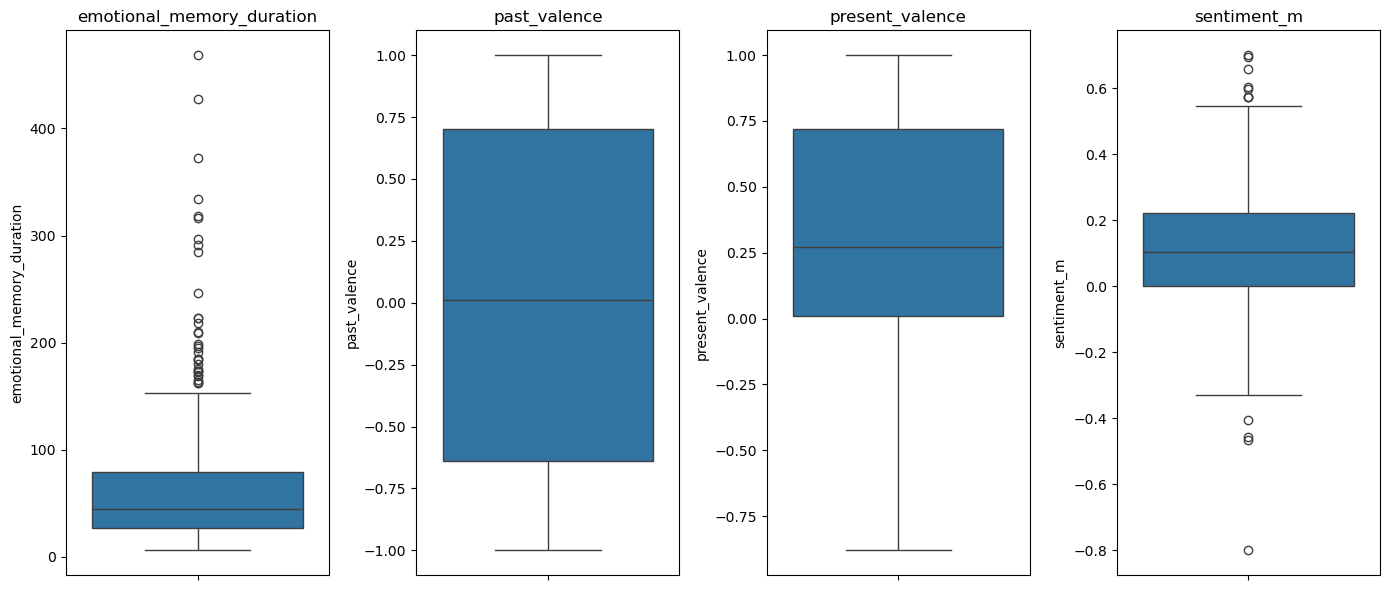

In [60]:
## find outliers -- plot boxplots

num_cols = [
    'emotional_memory_duration',
    'past_valence',
    'present_valence',
    'sentiment_m'
]

plt.figure(figsize=(14,6))
for i, col in enumerate(num_cols):
    plt.subplot(1,4,i+1)
    sns.boxplot(y=emotions_df[col])
    plt.title(col)

plt.tight_layout()

In [66]:
from IPython.display import display

def outlier_report(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    percent = (len(outliers) / len(df)) * 100
    
    print(f"\n--- {column.upper()} OUTLIERS ---")
    print(f"Lower bound: {round(lower,3)}  Upper bound: {round(upper,3)}")
    print(f"Outliers: {len(outliers)} rows ({round(percent,2)}%)")
    
    display(outliers[['participant','cue_word',column]])
    return outliers

# Run for duration and sentiment
duration_outliers = outlier_report(emotions_df, 'emotional_memory_duration')
sentiment_outliers = outlier_report(emotions_df, 'sentiment_m')



--- EMOTIONAL_MEMORY_DURATION OUTLIERS ---
Lower bound: -50.231  Upper bound: 156.439
Outliers: 33 rows (5.31%)


,participant,cue_word,emotional_memory_duration
88,2,Sad,316.16
92,2,Sad,210.30
93,2,Sad,223.43
127,3,Sad,168.48
205,5,Sad,209.29
227,6,Happy,218.38
237,6,Sad,284.44
304,8,Happy,291.51
305,8,Happy,191.11
317,8,Sad,296.56



--- SENTIMENT_M OUTLIERS ---
Lower bound: -0.331  Upper bound: 0.551
Outliers: 12 rows (1.93%)


,participant,cue_word,sentiment_m
7,1,Happy,0.700000
80,2,Happy,0.695583
85,2,Happy,0.603958
173,4,Sad,-0.466667
219,6,Happy,0.657500
240,6,Sad,-0.457188
249,7,Happy,0.598413
269,7,Happy,0.572292
413,11,Happy,0.574444
414,11,Happy,-0.800000


In [74]:
# load raw data
os.makedirs("data/02-processed", exist_ok=True)

emotions_df.to_csv(
    "data/02-processed/emotions_dataset.csv",
    index=False
)

print("Processed dataset saved")
processed_df = pd.read_csv("data/02-processed/emotions_dataset.csv")
processed_df.head()


Processed dataset saved


,participant,gender,cue_word,emotional_memory,emotional_memory_duration,past_valence,present_valence,sentiment_m,sentiment_sd
0,1,M,Happy,HM1,44.44,1.0,1.0,0.247500,0.297553
1,1,M,Happy,HM1,22.22,1.0,1.0,0.125000,0.000000
2,1,M,Happy,HM1,10.10,1.0,1.0,0.140000,0.000000
3,1,M,Happy,HM1,16.16,1.0,1.0,0.065625,0.119324
4,1,M,Happy,HM1,21.21,1.0,1.0,0.352500,0.000000


## Ethics

In [ ]:
Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback

## Team Expectations 

Emery Wang, 
Kaylin Chan,
Sarah Flores,
Mcallister Blair,
Mariarosa Cerritos Lara 

* *Team Expectation 1: When we make decisions about the project, it will be unanimous among group members.*
* *Team Expectation 2: Check in weekly via messages with online/in-person meetings arranged as necessary.*
* *Team Expecation 3: Maintain clean, polite, and timely communication with the team via iMessage group chat.*
* *Team Expectation 4: Check messages group chat before pushing to avoid merge conflicts.*
* *Team Expectation 5: Make it a habit to edit on the shared Google document before updating Git/Jupyter.*
* *Team Expectation 6: Notify Groupchat if you find yourself having trouble completing your work atleast 24 hours before the due date.*

## Project Timeline Proposal


| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 2/2  |  5 PM | Conduct deep dive into topic ideas, sources, and potential data sets. Figure out meeting times and dates  | Determine the best form of communication. Ensure group access to Git. Discuss and decide on the final project topic; divide up sections of work. Divide sections of the proposal | 
| 2/9  |  5 PM |  Complete project proposal parts as delegated and review as a whole. Do a shallow dive into data. | Make notes about the data and sources (i.e. outliers, noise, missing info). Decide upon next steps and delegate tasks | 
| 2/18  | N/A  | Finish delegated tasks & push to Git to submit. Determine next meeting as needed | Discuss insights after data collection. Determine if data supports hypothesis and next steps of visualization and analysis. Divy up tasks for next part|
| 2/23  | 5 PM  | Begin data wrangling. Deepen analysis based on meeting feedback of data. Begin brainstorming visualization | Review/Edit wrangling/EDA; Discuss Analysis Plan, divide section to push to Git |
| 3/2  | 5 PM  | Create plots, graphs, and such. Draft methods and results sections of the final project |Discuss progress on divided parts, and delegate next steps once more |
| 3/13  | 5 PM  | Complete analysis; Draft results/conclusion/discussion | Discuss/edit full project |
| 3/20  | Before 11:59 PM  | N/A | Turn in Final Project |